In [1]:
# First import the necessary libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt

2024-11-06 19:19:36.704607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

print("Contents of base_dir:",base_dir)
print("Contents of train_dir:",train_dir)
print("Contents of validation_dir:",validation_dir)
print()

Contents of base_dir: cats_and_dogs_filtered
Contents of train_dir: cats_and_dogs_filtered/train
Contents of validation_dir: cats_and_dogs_filtered/validation



In [3]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print("len(train_cats):",len(train_cats_fnames))
print("len(train_dogs):",len(train_dogs_fnames))
print()
print("len(validation_cats):",len(validation_cats_fnames))
print("len(validation_dogs):",len(validation_dogs_fnames))
print()

len(train_cats): 1000
len(train_dogs): 1000

len(validation_cats): 500
len(validation_dogs): 500



In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (150,150),
    batch_size = 20,
    label_mode = 'binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size = (150,150),
    batch_size = 20,
    label_mode = 'binary'
)

Found 2000 files belonging to 2 classes.


2024-11-06 19:30:15.380389: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 1000 files belonging to 2 classes.


In [6]:
shuffle_buffer_size = 1000
prefetch_buffer_size = tf.data.AUTOTUNE

train_dataset_final = train_dataset.cache().shuffle(buffer_size = shuffle_buffer_size).prefetch(buffer_size = prefetch_buffer_size)
validation_dataset_final = validation_dataset.cache().shuffle(buffer_size = shuffle_buffer_size).prefetch(buffer_size = prefetch_buffer_size)

In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (150,150,3)),
    tf.keras.layers.Rescaling(.1/255),

    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [18]:
history = model.fit(train_dataset_final,
          epochs=15,
          validation_data = validation_dataset_final,
          verbose=2
         )

Epoch 1/15
100/100 - 80s - loss: 0.6921 - accuracy: 0.5210 - val_loss: 0.6880 - val_accuracy: 0.5510 - 80s/epoch - 801ms/step
Epoch 2/15
100/100 - 64s - loss: 0.6861 - accuracy: 0.5620 - val_loss: 0.6707 - val_accuracy: 0.5990 - 64s/epoch - 644ms/step
Epoch 3/15
100/100 - 63s - loss: 0.6501 - accuracy: 0.6310 - val_loss: 0.6430 - val_accuracy: 0.6250 - 63s/epoch - 632ms/step
Epoch 4/15
100/100 - 62s - loss: 0.6115 - accuracy: 0.6865 - val_loss: 0.6292 - val_accuracy: 0.6550 - 62s/epoch - 619ms/step
Epoch 5/15
100/100 - 68s - loss: 0.5716 - accuracy: 0.7055 - val_loss: 0.6036 - val_accuracy: 0.6960 - 68s/epoch - 677ms/step
Epoch 6/15
100/100 - 67s - loss: 0.5135 - accuracy: 0.7555 - val_loss: 0.6341 - val_accuracy: 0.6720 - 67s/epoch - 674ms/step
Epoch 7/15
100/100 - 63s - loss: 0.4596 - accuracy: 0.7790 - val_loss: 0.6339 - val_accuracy: 0.6900 - 63s/epoch - 626ms/step
Epoch 8/15
100/100 - 69s - loss: 0.3755 - accuracy: 0.8330 - val_loss: 0.6206 - val_accuracy: 0.7040 - 69s/epoch - 687

In [20]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

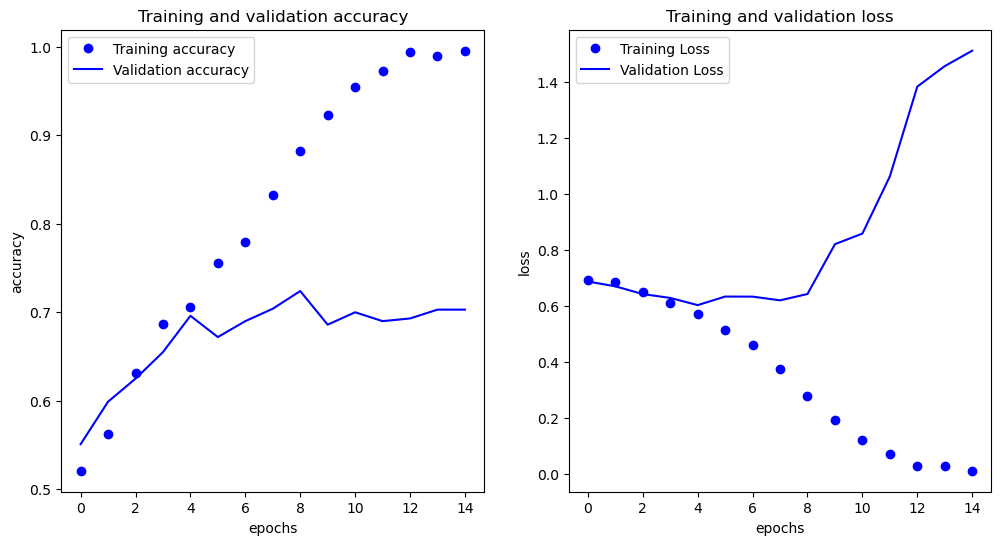

In [21]:
# Plot training results
plot_loss_acc(history)

In [28]:
Fill_Mode = 'nearest'

data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2,fill_mode = Fill_Mode),
    tf.keras.layers.RandomTranslation(0.2,0.2,fill_mode = Fill_Mode),
    tf.keras.layers.RandomZoom(0.2,fill_mode = Fill_Mode)
])

In [29]:
def demo_augmentation(sample_image, model, num_aug):
    '''Takes a single image array, then uses a model to generate num_aug transformations'''

    # Instantiate preview list
    image_preview = []

    # Convert input image to a PIL image instance
    sample_image_pil = tf.keras.utils.array_to_img(sample_image)

    # Append the result to the list
    image_preview.append(sample_image_pil)

    # Apply the image augmentation and append the results to the list
    for i in range(NUM_AUG):
        sample_image_aug = model(tf.expand_dims(sample_image, axis=0))
        sample_image_aug_pil = tf.keras.utils.array_to_img(tf.squeeze(sample_image_aug))
        image_preview.append(sample_image_aug_pil)

    # Instantiate a subplot
    fig, axes = plt.subplots(1, NUM_AUG + 1, figsize=(12, 12))

    # Preview the images.
    for index, ax in enumerate(axes):
        ax.imshow(image_preview[index])
        ax.set_axis_off()

        if index == 0:
            ax.set_title('original')
        else:
            ax.set_title(f'augment {index}')

In [30]:
# Get a batch of images
sample_batch = list(train_dataset.take(1))[0][0]
print(f'images per batch: {len(sample_batch)}')

2024-11-06 20:57:20.260799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2024-11-06 20:57:20.262293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2000]
	 [[{{node Placeholder/_0}}]]


images per batch: 20


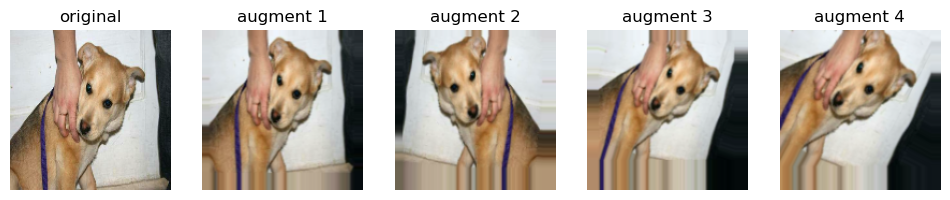

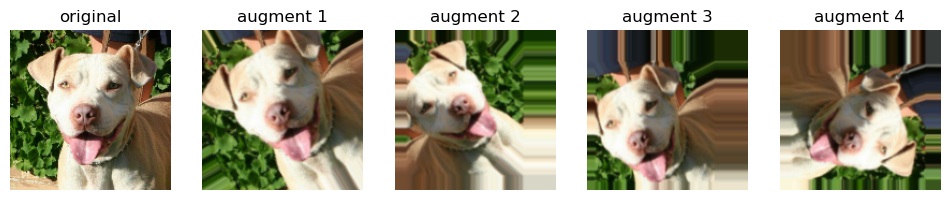

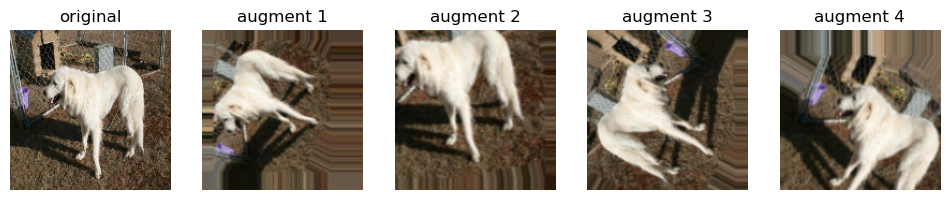

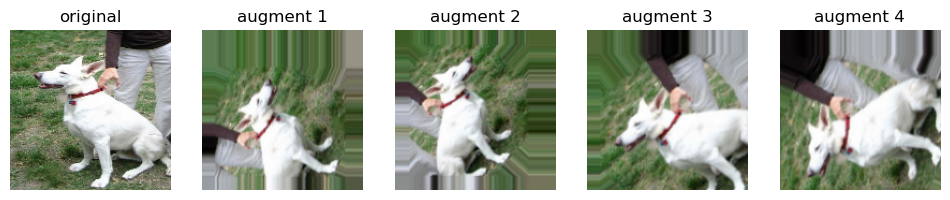

In [31]:
NUM_AUG = 4

# Apply the transformations to the first 4 images
demo_augmentation(sample_batch[0], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[1], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[2], data_augmentation, NUM_AUG)
demo_augmentation(sample_batch[3], data_augmentation, NUM_AUG)

# Uncomment the line below to delete the variable to free up some memory
# del sample_batch

In [32]:
def create_model():
    model = tf.keras.Sequential([
    tf.keras.Input(shape = (150,150,3)),
    tf.keras.layers.Rescaling(.1/255),

    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
    return model

In [33]:
# Instantiate the base model
model_without_aug = create_model()

# Prepend the data augmentation layers to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model_without_aug
])

# Compile the model
model_with_aug.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])

In [34]:
EPOCHS=10

# Train the new model
history_with_aug = model_with_aug.fit(
      train_dataset_final,
      epochs=EPOCHS,
      validation_data=validation_dataset_final,
      verbose=2)

Epoch 1/10
100/100 - 94s - loss: 0.6930 - accuracy: 0.5185 - val_loss: 0.6923 - val_accuracy: 0.5000 - 94s/epoch - 942ms/step
Epoch 2/10
100/100 - 83s - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6916 - val_accuracy: 0.5050 - 83s/epoch - 826ms/step
Epoch 3/10
100/100 - 88s - loss: 0.6919 - accuracy: 0.5100 - val_loss: 0.6906 - val_accuracy: 0.5260 - 88s/epoch - 881ms/step
Epoch 4/10
100/100 - 88s - loss: 0.6911 - accuracy: 0.5310 - val_loss: 0.6875 - val_accuracy: 0.5530 - 88s/epoch - 876ms/step
Epoch 5/10
100/100 - 80s - loss: 0.6907 - accuracy: 0.5330 - val_loss: 0.6852 - val_accuracy: 0.5580 - 80s/epoch - 805ms/step
Epoch 6/10
100/100 - 80s - loss: 0.6889 - accuracy: 0.5375 - val_loss: 0.6834 - val_accuracy: 0.5540 - 80s/epoch - 805ms/step
Epoch 7/10
100/100 - 80s - loss: 0.6870 - accuracy: 0.5480 - val_loss: 0.6801 - val_accuracy: 0.5600 - 80s/epoch - 802ms/step
Epoch 8/10
100/100 - 81s - loss: 0.6828 - accuracy: 0.5595 - val_loss: 0.6753 - val_accuracy: 0.5710 - 81s/epoch - 807

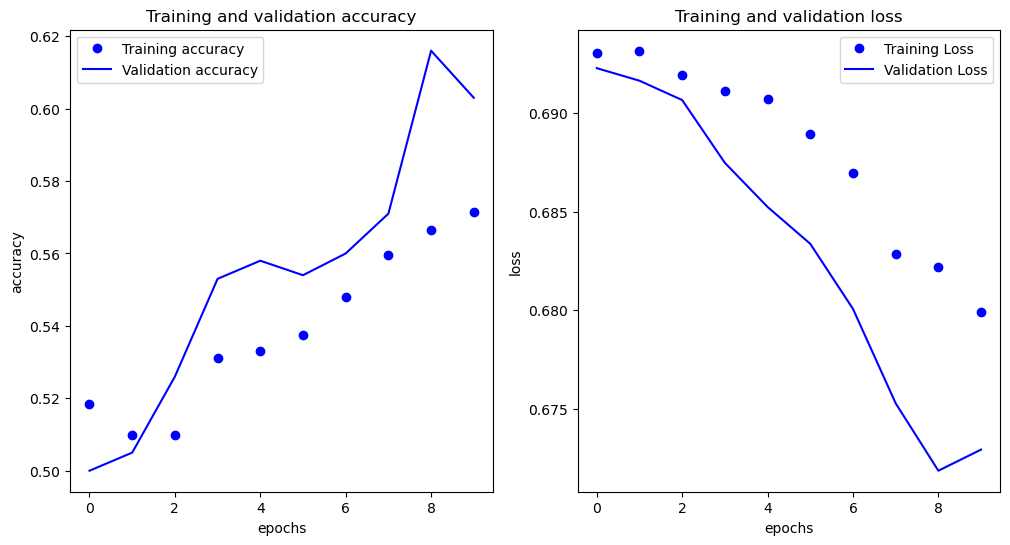

In [35]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)